# EDA - Technical Analysis Data (OHLCV)

**Exploratory Data Analysis** cho dữ liệu giá cổ phiếu Việt Nam (2022-2025)

---

## Nội dung

1. **Mô tả dữ liệu** (Data Description)
2. **Kiểm tra chất lượng dữ liệu** (Data Quality Check)
3. **Tạo đặc trưng cơ bản** (Feature Engineering)
4. **Trực quan hóa & Phân tích** (Visualization & Insights)
5. **Tổng kết** (Conclusion)

## 0. Import Libraries & Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Plotting configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Load data
DATA_PATH = Path("../../data/raw/ta/vietnam_stock_price_history_2022-10-31_2025-10-31.csv")

df = pd.read_csv(DATA_PATH)
df['time'] = pd.to_datetime(df['time'])

print(f"✓ Data loaded successfully: {DATA_PATH.name}")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

✓ Data loaded successfully: vietnam_stock_price_history_2022-10-31_2025-10-31.csv
Shape: 1,221,931 rows × 7 columns


In [3]:
# Quick preview
df.head(10)

,time,open,high,low,close,volume,symbol
0,2022-07-29,22.98,22.98,22.98,22.98,100,A32
1,2022-08-01,23.53,24.94,23.53,24.94,7300,A32
2,2022-08-02,24.63,24.63,24.63,24.63,0,A32
3,2022-08-03,22.43,23.53,22.43,23.53,601,A32
4,2022-08-04,23.37,23.37,23.37,23.37,0,A32
5,2022-08-05,23.37,23.37,23.37,23.37,0,A32
6,2022-08-08,23.37,23.37,23.37,23.37,1,A32
7,2022-08-09,22.75,22.75,22.75,22.75,500,A32
8,2022-08-10,22.75,22.82,22.75,22.75,5000,A32
9,2022-08-11,22.75,22.75,22.75,22.75,1000,A32


---

## 1. Mô tả Dữ liệu (Data Description)

### 1.1. Cấu trúc Dữ liệu (Data Structure)

In [4]:
# Dataset shape
print("=" * 60)
print("DATASET STRUCTURE")
print("=" * 60)
print(f"Total Rows:    {df.shape[0]:>12,}")
print(f"Total Columns: {df.shape[1]:>12,}")
print(f"\nMemory Usage:  {df.memory_usage(deep=True).sum() / 1024**2:>12,.2f} MB")
print("=" * 60)

DATASET STRUCTURE
Total Rows:       1,221,931
Total Columns:            7

Memory Usage:        125.91 MB


In [5]:
# Data types
print("\nDATA TYPES:")
print(df.dtypes)
print("\n" + "=" * 60)


DATA TYPES:
time      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
symbol            object
dtype: object



### 1.2. Phạm vi Dữ liệu (Data Scope)

In [6]:
# Time scope
print("=" * 60)
print("DATA SCOPE")
print("=" * 60)
print(f"Start Date:         {df['time'].min().strftime('%Y-%m-%d')}")
print(f"End Date:           {df['time'].max().strftime('%Y-%m-%d')}")
print(f"Total Days:         {(df['time'].max() - df['time'].min()).days:,} days")
print(f"Unique Symbols:     {df['symbol'].nunique():,} stocks")
print(f"Avg Rows/Symbol:    {df.shape[0] / df['symbol'].nunique():,.0f} rows")
print("=" * 60)

DATA SCOPE
Start Date:         2021-03-12
End Date:           2025-10-31
Total Days:         1,694 days
Unique Symbols:     1,600 stocks
Avg Rows/Symbol:    764 rows
Avg Rows/Symbol:    764 rows


### 1.3. Thống kê Tóm tắt (Summary Statistics)

In [7]:
# Summary statistics
print("\nSUMMARY STATISTICS (OHLCV):")
print("=" * 80)
display(df[['open', 'high', 'low', 'close', 'volume']].describe())


SUMMARY STATISTICS (OHLCV):



SUMMARY STATISTICS (OHLCV):


,open,high,low,close,volume
count,1.221931e+06,1.221931e+06,1.221931e+06,1.221931e+06,1.221931e+06
mean,1.832240e+01,1.851212e+01,1.812376e+01,1.833112e+01,5.723595e+05
std,2.750590e+01,2.778285e+01,2.721481e+01,2.749335e+01,3.065926e+06
min,3.000000e-02,3.000000e-02,3.000000e-02,3.000000e-02,0.000000e+00
25%,6.700000e+00,6.800000e+00,6.600000e+00,6.700000e+00,0.000000e+00
50%,1.167000e+01,1.180000e+01,1.152000e+01,1.168000e+01,1.700000e+03
75%,2.125000e+01,2.147000e+01,2.101000e+01,2.126000e+01,6.200000e+04
max,1.562500e+03,1.562500e+03,1.358700e+03,1.358700e+03,2.497607e+08


In [8]:
# Observations
print("\n📊 OBSERVATIONS:")
print(f"  • Price range: {df['close'].min():.2f} - {df['close'].max():,.2f} VND")
print(f"  • Average close price: {df['close'].mean():,.2f} VND")
print(f"  • Price std deviation: {df['close'].std():,.2f} VND (high variability)")
print(f"  • Volume is highly skewed (mean >> median)")
print(f"  • Max volume: {df['volume'].max():,.0f} (potential outlier or IPO day)")


📊 OBSERVATIONS:
  • Price range: 0.03 - 1,358.70 VND
  • Average close price: 18.33 VND
  • Price std deviation: 27.49 VND (high variability)
  • Volume is highly skewed (mean >> median)
  • Max volume: 249,760,712 (potential outlier or IPO day)


---

## 2. Kiểm tra Chất lượng Dữ liệu (Data Quality Check)

### 2.1. Kiểm tra Giá trị Thiếu (Missing Values)

In [9]:
# Missing values analysis
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

print(missing_data.to_string(index=False))
print("=" * 60)

if df.isnull().sum().sum() == 0:
    print("✓ No missing values detected!")
else:
    print("⚠ Missing values found - need handling")

MISSING VALUES ANALYSIS
Column  Missing_Count  Missing_Percentage
  time              0                 0.0
  open              0                 0.0
  high              0                 0.0
   low              0                 0.0
 close              0                 0.0
volume              0                 0.0
symbol              0                 0.0
✓ No missing values detected!


### 2.2. Kiểm tra Tính Nhất quán (Consistency Check)

In [10]:
# Consistency checks
print("=" * 60)
print("CONSISTENCY CHECKS")
print("=" * 60)

# Price logic checks
invalid_high_low = (df['high'] < df['low']).sum()
invalid_high_close = (df['high'] < df['close']).sum()
invalid_high_open = (df['high'] < df['open']).sum()
invalid_low_close = (df['low'] > df['close']).sum()
invalid_low_open = (df['low'] > df['open']).sum()
invalid_volume = (df['volume'] < 0).sum()

print(f"Rows where HIGH < LOW:   {invalid_high_low:>10,}")
print(f"Rows where HIGH < CLOSE: {invalid_high_close:>10,}")
print(f"Rows where HIGH < OPEN:  {invalid_high_open:>10,}")
print(f"Rows where LOW > CLOSE:  {invalid_low_close:>10,}")
print(f"Rows where LOW > OPEN:   {invalid_low_open:>10,}")
print(f"Rows where VOLUME < 0:   {invalid_volume:>10,}")
print("=" * 60)

total_inconsistent = (invalid_high_low + invalid_high_close + invalid_high_open + 
                      invalid_low_close + invalid_low_open + invalid_volume)

if total_inconsistent == 0:
    print("✓ All price logic checks passed!")
else:
    print(f"⚠ Found {total_inconsistent} inconsistent rows")

CONSISTENCY CHECKS
Rows where HIGH < LOW:            0
Rows where HIGH < CLOSE:         34
Rows where HIGH < OPEN:         365
Rows where LOW > CLOSE:          37
Rows where LOW > OPEN:          942
Rows where VOLUME < 0:            0
⚠ Found 1378 inconsistent rows


In [11]:
# Check for duplicates
print("\nDUPLICATE CHECK:")
duplicates = df.duplicated(subset=['time', 'symbol']).sum()
print(f"Duplicate (time, symbol) pairs: {duplicates:,}")

if duplicates > 0:
    print("⚠ Found duplicate records - need to deduplicate")
else:
    print("✓ No duplicates found")


DUPLICATE CHECK:
Duplicate (time, symbol) pairs: 0
✓ No duplicates found
Duplicate (time, symbol) pairs: 0
✓ No duplicates found


---

## 3. Tạo Đặc trưng Cơ bản (Feature Engineering)

### 3.1. Tính Toán Return & Volatility

In [12]:
# Sort data by symbol and time
df = df.sort_values(['symbol', 'time']).reset_index(drop=True)

# Calculate features for each symbol
print("Creating features...")

# Daily Return (%)
df['daily_return'] = df.groupby('symbol')['close'].pct_change() * 100

# Next Day Return (Target variable)
df['next_day_return'] = df.groupby('symbol')['close'].pct_change().shift(-1) * 100

# Volatility (20-day rolling std of returns)
df['volatility'] = df.groupby('symbol')['daily_return'].transform(
    lambda x: x.rolling(window=20, min_periods=1).std()
)

# Moving Average (20-day)
df['ma_20'] = df.groupby('symbol')['close'].transform(
    lambda x: x.rolling(window=20, min_periods=1).mean()
)

# MA Divergence (%)
df['ma_divergence'] = ((df['close'] - df['ma_20']) / df['ma_20']) * 100

# Price Range (High - Low)
df['price_range'] = df['high'] - df['low']

# Price Range %
df['price_range_pct'] = (df['price_range'] / df['low']) * 100

print("✓ Features created successfully")
print(f"New columns: {list(df.columns[-7:])}")

Creating features...
✓ Features created successfully
New columns: ['daily_return', 'next_day_return', 'volatility', 'ma_20', 'ma_divergence', 'price_range', 'price_range_pct']
✓ Features created successfully
New columns: ['daily_return', 'next_day_return', 'volatility', 'ma_20', 'ma_divergence', 'price_range', 'price_range_pct']


### 3.2. Tạo Nhãn Phân loại (Label Generation)

In [13]:
# Create trend labels based on next_day_return
THRESHOLD = 1.0  # 1% threshold

def classify_trend(return_value):
    if pd.isna(return_value):
        return None
    elif return_value > THRESHOLD:
        return 'Up'
    elif return_value < -THRESHOLD:
        return 'Down'
    else:
        return 'Hold'

df['trend'] = df['next_day_return'].apply(classify_trend)

print(f"✓ Trend labels created with threshold = ±{THRESHOLD}%")
print(f"\nLabel distribution:")
print(df['trend'].value_counts())
print(f"\nLabel distribution (%):")
print(df['trend'].value_counts(normalize=True).mul(100).round(2))

✓ Trend labels created with threshold = ±1.0%

Label distribution:
trend
Hold    750471
Up      235117
Down    234743
Name: count, dtype: int64

Label distribution (%):
trend
Hold    61.50
Up      19.27
Down    19.24
Name: proportion, dtype: float64


In [14]:
# Preview engineered features
print("\nSample data with engineered features:")
display(df[['time', 'symbol', 'close', 'daily_return', 'next_day_return', 'volatility', 'ma_divergence', 'trend']].head(25))


Sample data with engineered features:


,time,symbol,close,daily_return,next_day_return,volatility,ma_divergence,trend
0,2022-07-29,A32,22.98,NaN,8.529156,NaN,0.000000,Up
1,2022-08-01,A32,24.94,8.529156,-1.242983,NaN,4.090150,Down
2,2022-08-02,A32,24.63,-1.242983,-4.466098,6.909946,1.847002,Down
3,2022-08-03,A32,23.53,-4.466098,-0.679983,6.767075,-2.039967,Hold
4,2022-08-04,A32,23.37,-0.679983,0.000000,5.584351,-2.176643,Hold
5,2022-08-05,A32,23.37,0.000000,0.000000,4.842105,-1.820473,Hold
6,2022-08-08,A32,23.37,0.000000,-2.652974,4.334434,-1.564474,Down
7,2022-08-09,A32,22.75,-2.652974,0.000000,4.117050,-3.673124,Hold
8,2022-08-10,A32,22.75,0.000000,0.000000,3.811736,-3.278379,Hold
9,2022-08-11,A32,22.75,0.000000,0.000000,3.565616,-2.960246,Hold


---

## 4. Trực quan hóa & Phân tích (Visualization & Insights)

### 4.1. Phân tích Xu hướng Thị trường (Market Trend Analysis)

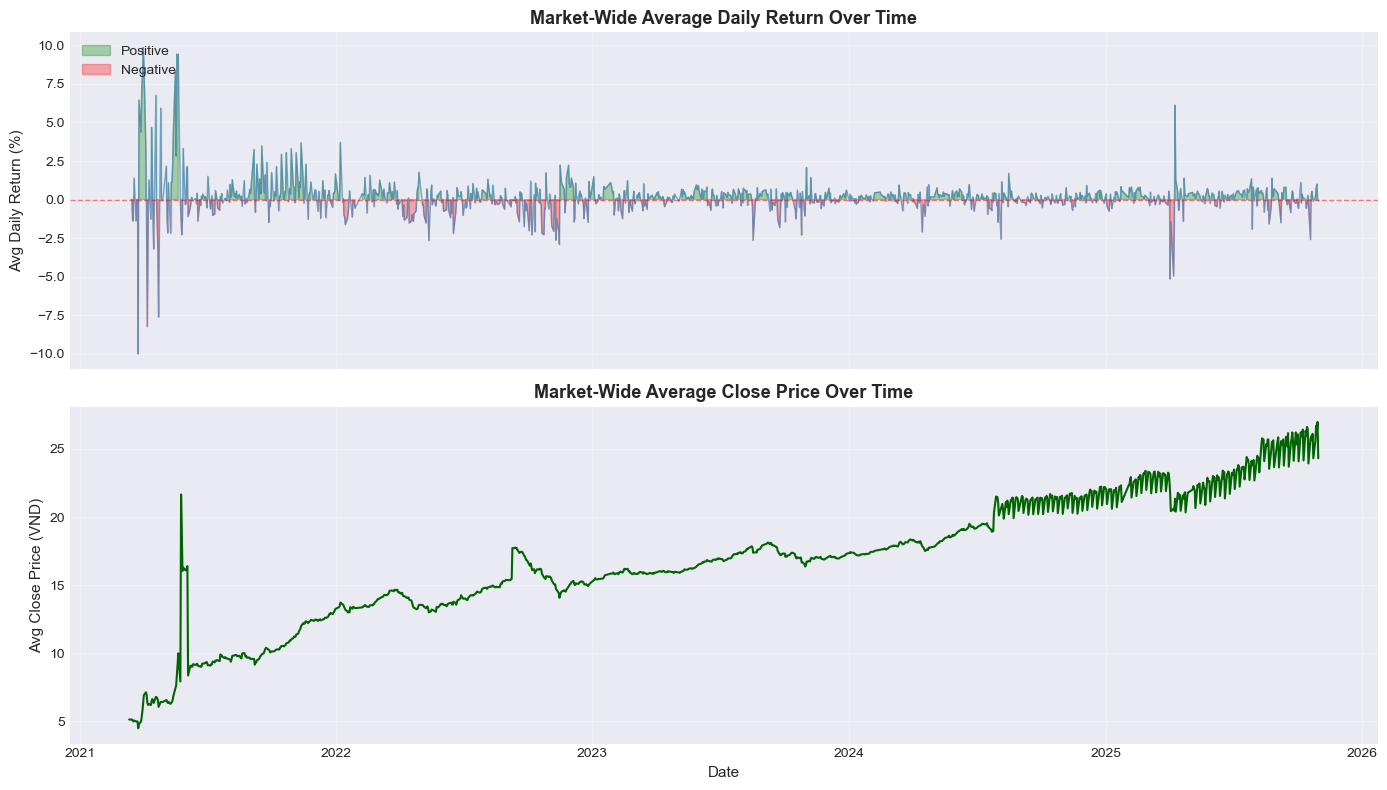

📈 INSIGHTS:
  • Overall market trend: Uptrend
  • Average daily return: 0.156%
  • Most volatile period: 2021-03-25


In [15]:
# Aggregate market-wide daily returns
market_daily = df.groupby('time').agg({
    'daily_return': 'mean',
    'volume': 'sum',
    'close': 'mean'
}).reset_index()

# Plot market trend
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Average daily return
axes[0].plot(market_daily['time'], market_daily['daily_return'], linewidth=1, alpha=0.7, color='steelblue')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[0].fill_between(market_daily['time'], market_daily['daily_return'], 0, 
                      where=(market_daily['daily_return'] > 0), color='green', alpha=0.3, label='Positive')
axes[0].fill_between(market_daily['time'], market_daily['daily_return'], 0, 
                      where=(market_daily['daily_return'] <= 0), color='red', alpha=0.3, label='Negative')
axes[0].set_ylabel('Avg Daily Return (%)', fontsize=11)
axes[0].set_title('Market-Wide Average Daily Return Over Time', fontsize=13, fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Average close price
axes[1].plot(market_daily['time'], market_daily['close'], linewidth=1.5, color='darkgreen')
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_ylabel('Avg Close Price (VND)', fontsize=11)
axes[1].set_title('Market-Wide Average Close Price Over Time', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📈 INSIGHTS:")
print(f"  • Overall market trend: {'Uptrend' if market_daily['daily_return'].mean() > 0 else 'Downtrend'}")
print(f"  • Average daily return: {market_daily['daily_return'].mean():.3f}%")
print(f"  • Most volatile period: {market_daily.loc[market_daily['daily_return'].abs().idxmax(), 'time'].strftime('%Y-%m-%d')}")

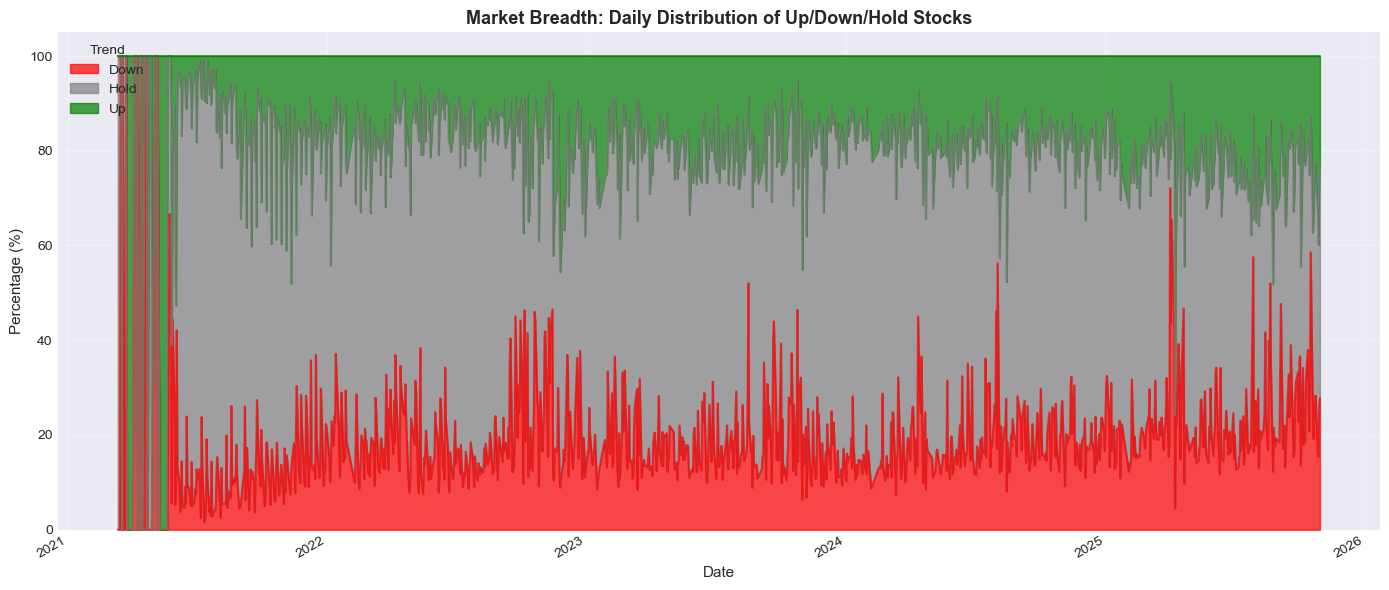

📊 MARKET BREADTH INSIGHTS:
  • Average % Up:   19.8%
  • Average % Down: 19.0%
  • Average % Hold: 61.1%


In [16]:
# Market breadth analysis (% of stocks Up/Down/Hold each day)
df_with_trend = df[df['trend'].notna()].copy()
market_breadth = df_with_trend.groupby(['time', 'trend']).size().unstack(fill_value=0)
market_breadth_pct = market_breadth.div(market_breadth.sum(axis=1), axis=0) * 100

# Plot stacked area chart
fig, ax = plt.subplots(figsize=(14, 6))
market_breadth_pct.plot(kind='area', stacked=True, ax=ax, 
                        color=['red', 'gray', 'green'], alpha=0.7)
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Percentage (%)', fontsize=11)
ax.set_title('Market Breadth: Daily Distribution of Up/Down/Hold Stocks', fontsize=13, fontweight='bold')
ax.legend(title='Trend', loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 MARKET BREADTH INSIGHTS:")
avg_breadth = market_breadth_pct.mean()
print(f"  • Average % Up:   {avg_breadth.get('Up', 0):.1f}%")
print(f"  • Average % Down: {avg_breadth.get('Down', 0):.1f}%")
print(f"  • Average % Hold: {avg_breadth.get('Hold', 0):.1f}%")

### 4.2. Phân tích Phân phối (Distribution Analysis)

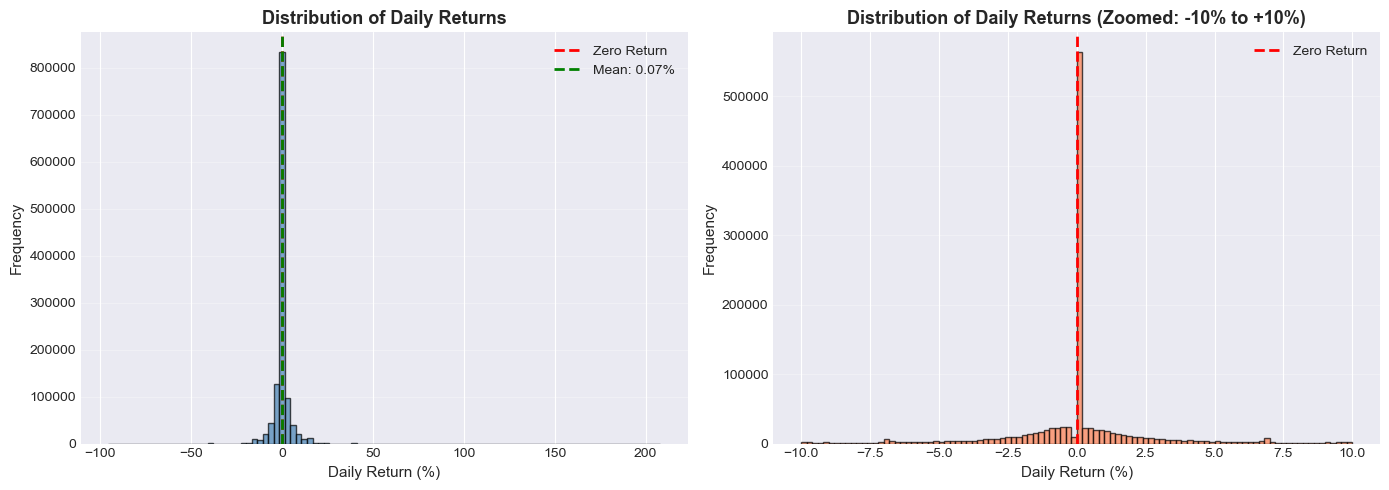

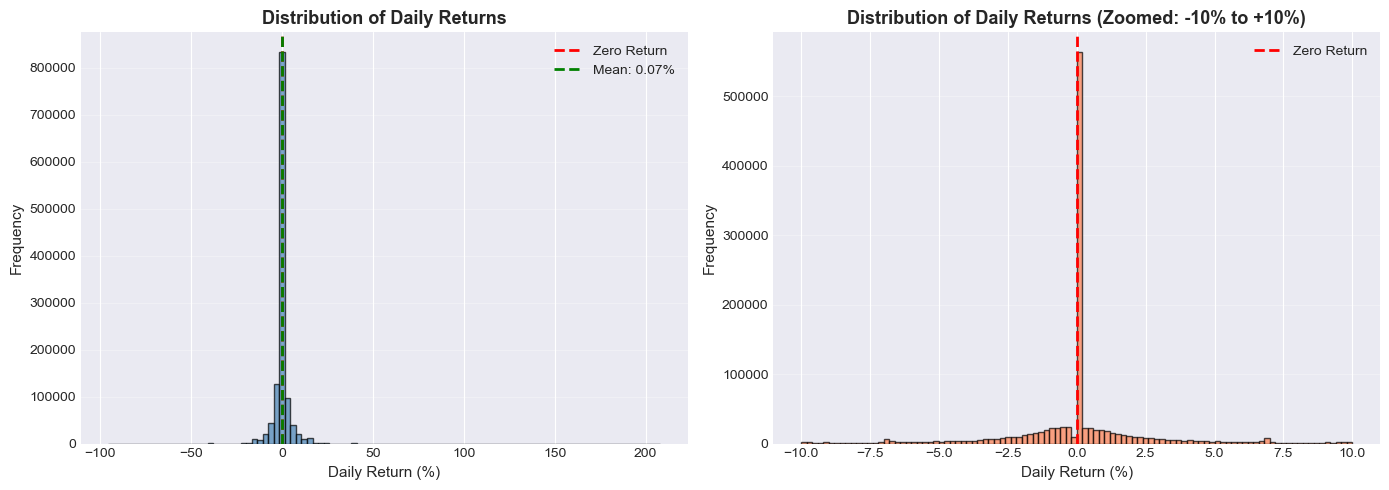

📊 DISTRIBUTION STATISTICS:
  • Mean:     0.0727%
  • Median:   0.0000%
  • Std Dev:  3.8249%
  • Skewness: 0.6440
  • Kurtosis: 29.6748
  • Min:      -95.24%
  • Max:      207.85%

  ⚠ High kurtosis indicates fat tails (extreme events more common than normal distribution)


In [17]:
# Distribution of daily returns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
df_clean = df[df['daily_return'].notna()]
axes[0].hist(df_clean['daily_return'], bins=100, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Return')
axes[0].axvline(x=df_clean['daily_return'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {df_clean["daily_return"].mean():.2f}%')
axes[0].set_xlabel('Daily Return (%)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Daily Returns', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Histogram with limited range (zoom in)
returns_filtered = df_clean[(df_clean['daily_return'] >= -10) & (df_clean['daily_return'] <= 10)]
axes[1].hist(returns_filtered['daily_return'], bins=100, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Return')
axes[1].set_xlabel('Daily Return (%)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Daily Returns (Zoomed: -10% to +10%)', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistics
print("📊 DISTRIBUTION STATISTICS:")
print(f"  • Mean:     {df_clean['daily_return'].mean():.4f}%")
print(f"  • Median:   {df_clean['daily_return'].median():.4f}%")
print(f"  • Std Dev:  {df_clean['daily_return'].std():.4f}%")
print(f"  • Skewness: {df_clean['daily_return'].skew():.4f}")
print(f"  • Kurtosis: {df_clean['daily_return'].kurtosis():.4f}")
print(f"  • Min:      {df_clean['daily_return'].min():.2f}%")
print(f"  • Max:      {df_clean['daily_return'].max():.2f}%")
print(f"\n  ⚠ High kurtosis indicates fat tails (extreme events more common than normal distribution)")

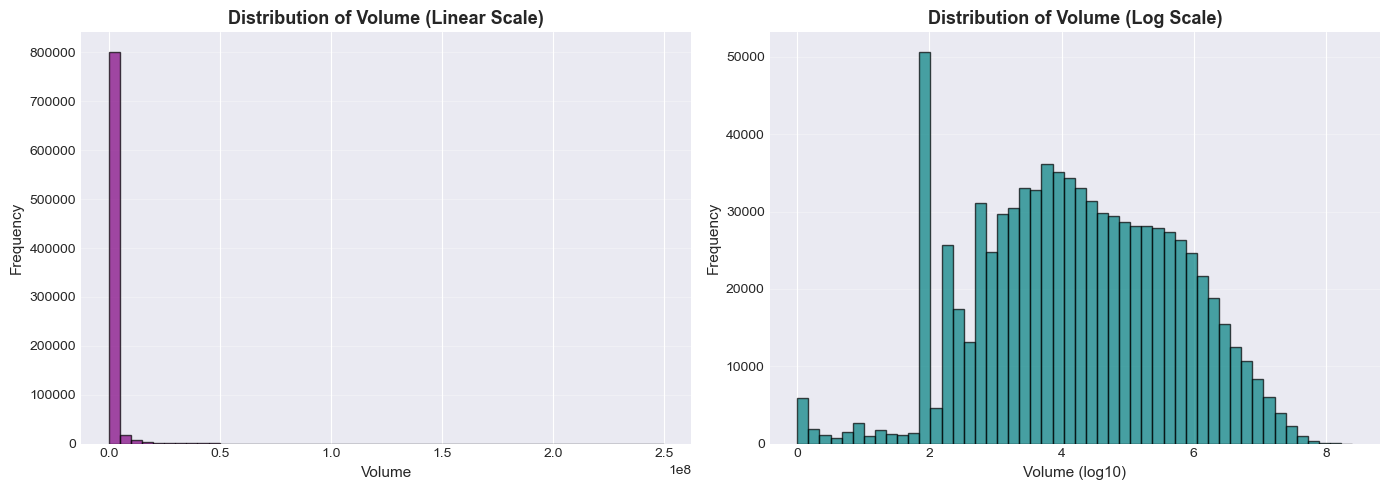

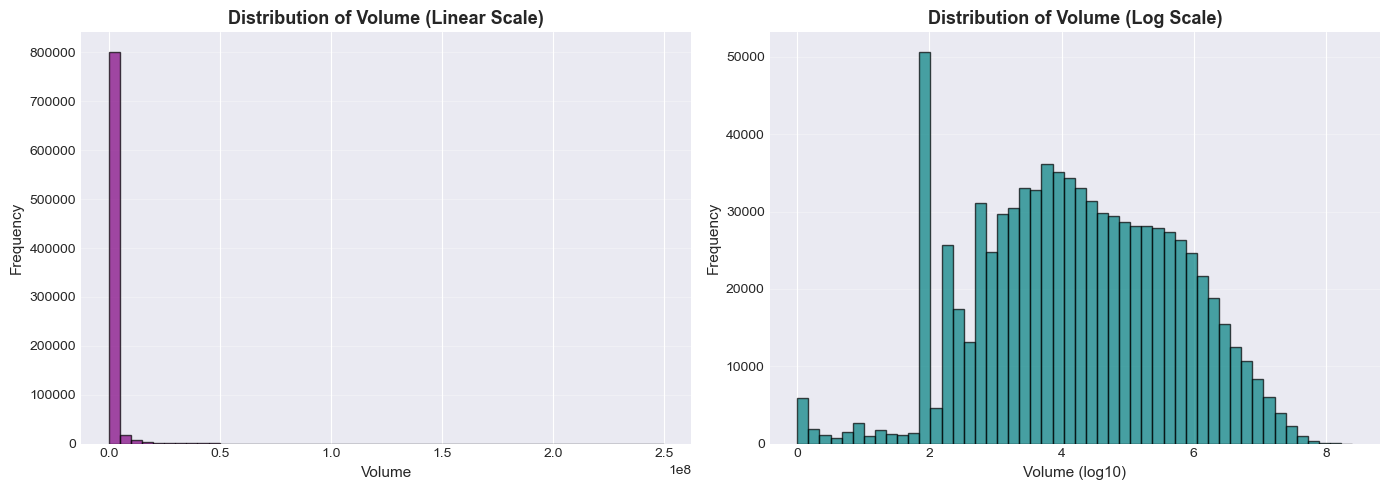

📊 VOLUME DISTRIBUTION:
  • Mean volume:      837,467
  • Median volume:    15,509
  • Skewness:         12.95 (highly right-skewed)
  • Days with volume = 0: 386,813 (31.7%)


In [18]:
# Volume distribution (log scale)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Normal scale
df_vol = df[df['volume'] > 0]
axes[0].hist(df_vol['volume'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0].set_xlabel('Volume', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Volume (Linear Scale)', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Log scale
axes[1].hist(np.log10(df_vol['volume']), bins=50, edgecolor='black', alpha=0.7, color='teal')
axes[1].set_xlabel('Volume (log10)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Volume (Log Scale)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("📊 VOLUME DISTRIBUTION:")
print(f"  • Mean volume:      {df_vol['volume'].mean():,.0f}")
print(f"  • Median volume:    {df_vol['volume'].median():,.0f}")
print(f"  • Skewness:         {df_vol['volume'].skew():.2f} (highly right-skewed)")
print(f"  • Days with volume = 0: {(df['volume'] == 0).sum():,} ({(df['volume'] == 0).sum() / len(df) * 100:.1f}%)")

### 4.3. Phân tích Nhãn (Label Analysis)

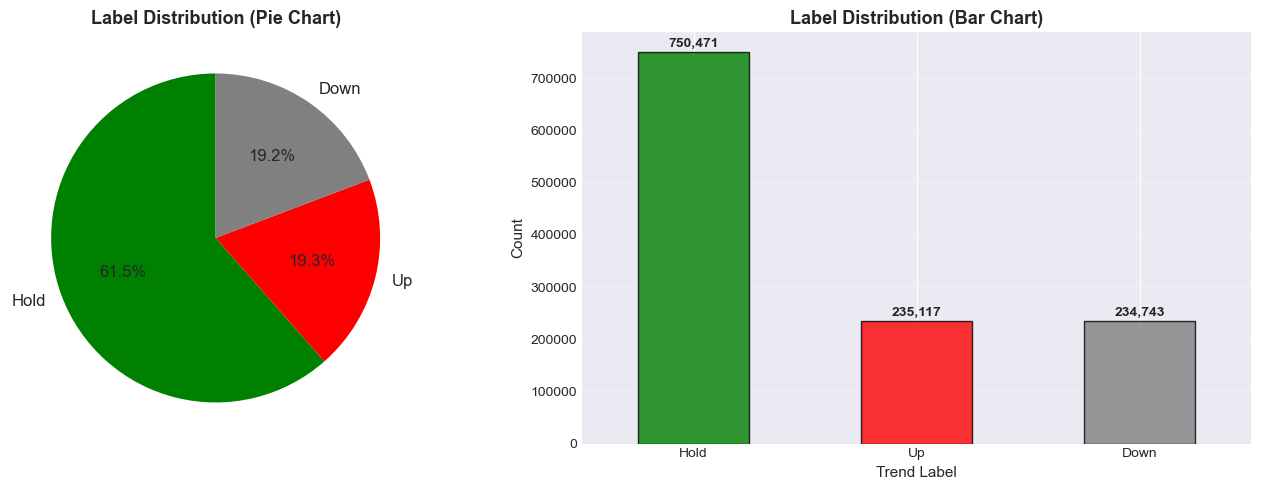

📊 LABEL DISTRIBUTION:
  • Up   :  235,117 (19.27%)
  • Down :  234,743 (19.24%)
  • Hold :  750,471 (61.50%)

  ⚠ CLASS IMBALANCE DETECTED: 'Hold' dominates at 61.5%
     Consider using techniques like SMOTE, class weights, or adjusting threshold


In [19]:
# Label distribution visualization
trend_counts = df['trend'].value_counts()
trend_pcts = df['trend'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['green', 'red', 'gray']
axes[0].pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 12})
axes[0].set_title('Label Distribution (Pie Chart)', fontsize=13, fontweight='bold')

# Bar chart
trend_counts.plot(kind='bar', ax=axes[1], color=colors, edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Trend Label', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].set_title('Label Distribution (Bar Chart)', fontsize=13, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(trend_counts):
    axes[1].text(i, v + 10000, f'{v:,}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 LABEL DISTRIBUTION:")
for label in ['Up', 'Down', 'Hold']:
    if label in trend_counts:
        print(f"  • {label:5s}: {trend_counts[label]:>8,} ({trend_pcts[label]:>5.2f}%)")

# Check for class imbalance
if 'Hold' in trend_pcts and trend_pcts['Hold'] > 60:
    print(f"\n  ⚠ CLASS IMBALANCE DETECTED: 'Hold' dominates at {trend_pcts['Hold']:.1f}%")
    print(f"     Consider using techniques like SMOTE, class weights, or adjusting threshold")

### 4.4. Phân tích Tương quan (Correlation Analysis)

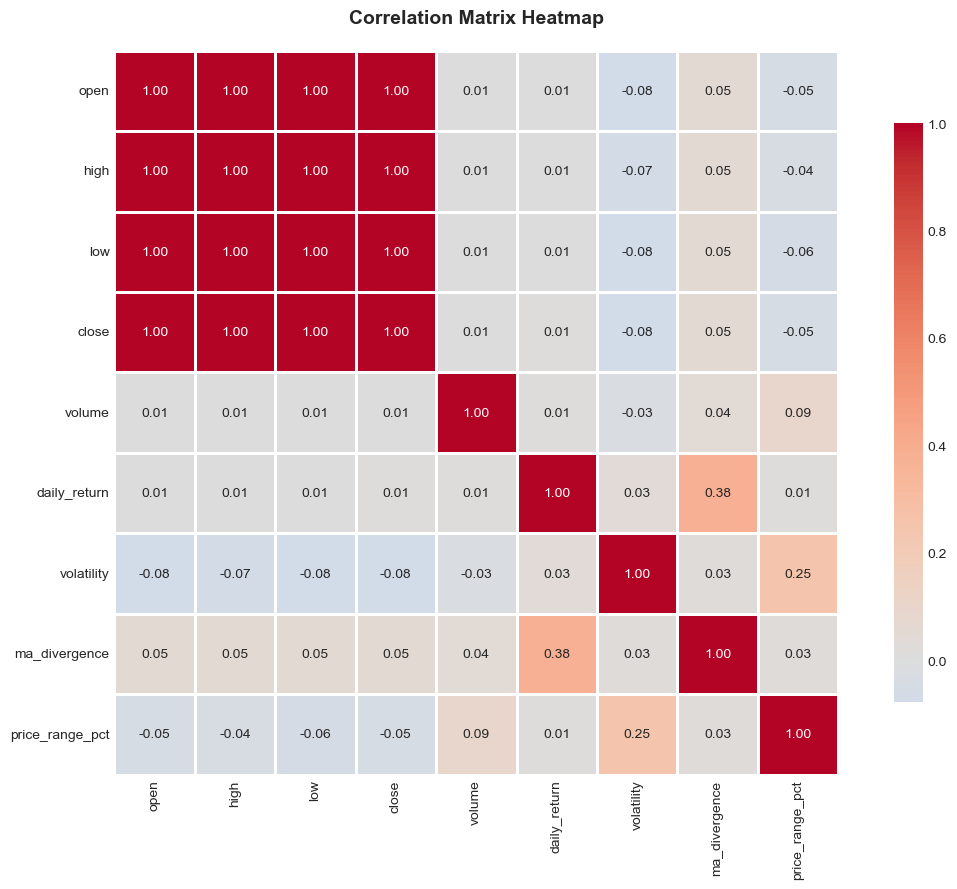

📊 CORRELATION INSIGHTS:

  Strong positive correlations (> 0.8):
    • open            ↔ high           : 1.000
    • open            ↔ low            : 1.000
    • open            ↔ close          : 0.999
    • high            ↔ low            : 0.999
    • high            ↔ close          : 1.000
    • low             ↔ close          : 1.000

  Strong negative correlations (< -0.5):
    • None found

  ⚠ MULTICOLLINEARITY WARNING:
    Open, High, Low, Close are highly correlated (expected)
    Consider using only 'close' price for modeling to avoid redundancy


In [20]:
# Correlation matrix
corr_cols = ['open', 'high', 'low', 'close', 'volume', 'daily_return', 'volatility', 'ma_divergence', 'price_range_pct']
corr_matrix = df[corr_cols].corr()

# Heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("📊 CORRELATION INSIGHTS:")
print("\n  Strong positive correlations (> 0.8):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.8:
            print(f"    • {corr_matrix.columns[i]:15s} ↔ {corr_matrix.columns[j]:15s}: {corr_matrix.iloc[i, j]:.3f}")

print("\n  Strong negative correlations (< -0.5):")
found = False
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] < -0.5:
            print(f"    • {corr_matrix.columns[i]:15s} ↔ {corr_matrix.columns[j]:15s}: {corr_matrix.iloc[i, j]:.3f}")
            found = True
if not found:
    print("    • None found")

print("\n  ⚠ MULTICOLLINEARITY WARNING:")
print("    Open, High, Low, Close are highly correlated (expected)")
print("    Consider using only 'close' price for modeling to avoid redundancy")

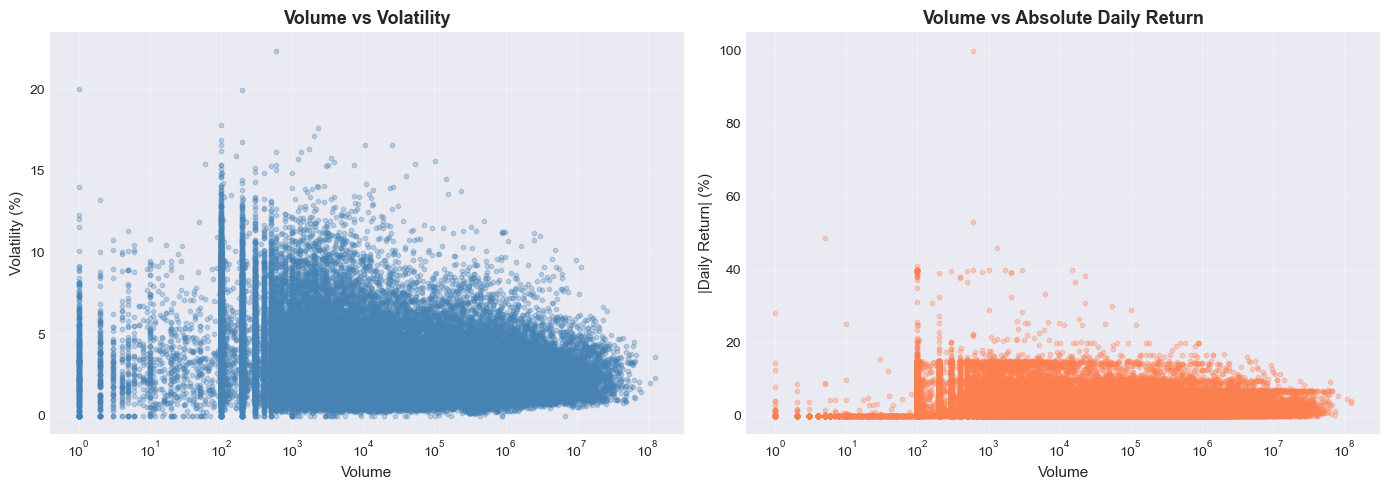

📊 VOLUME-VOLATILITY RELATIONSHIP:
  • Correlation: -0.027
  • Weak correlation - Volume doesn't strongly predict volatility


In [21]:
# Scatter plot: Volume vs Volatility
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sample data for visualization (too many points)
df_sample = df[df['volatility'].notna() & (df['volume'] > 0)].sample(n=min(50000, len(df)), random_state=42)

# Volume vs Volatility
axes[0].scatter(df_sample['volume'], df_sample['volatility'], alpha=0.3, s=10, color='steelblue')
axes[0].set_xlabel('Volume', fontsize=11)
axes[0].set_ylabel('Volatility (%)', fontsize=11)
axes[0].set_title('Volume vs Volatility', fontsize=13, fontweight='bold')
axes[0].set_xscale('log')
axes[0].grid(True, alpha=0.3)

# Volume vs Daily Return (absolute)
axes[1].scatter(df_sample['volume'], df_sample['daily_return'].abs(), alpha=0.3, s=10, color='coral')
axes[1].set_xlabel('Volume', fontsize=11)
axes[1].set_ylabel('|Daily Return| (%)', fontsize=11)
axes[1].set_title('Volume vs Absolute Daily Return', fontsize=13, fontweight='bold')
axes[1].set_xscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 VOLUME-VOLATILITY RELATIONSHIP:")
corr_vol_volatility = df[['volume', 'volatility']].corr().iloc[0, 1]
print(f"  • Correlation: {corr_vol_volatility:.3f}")
if abs(corr_vol_volatility) < 0.3:
    print(f"  • Weak correlation - Volume doesn't strongly predict volatility")

### 4.5. Phát hiện Ngoại lệ (Outlier Detection)

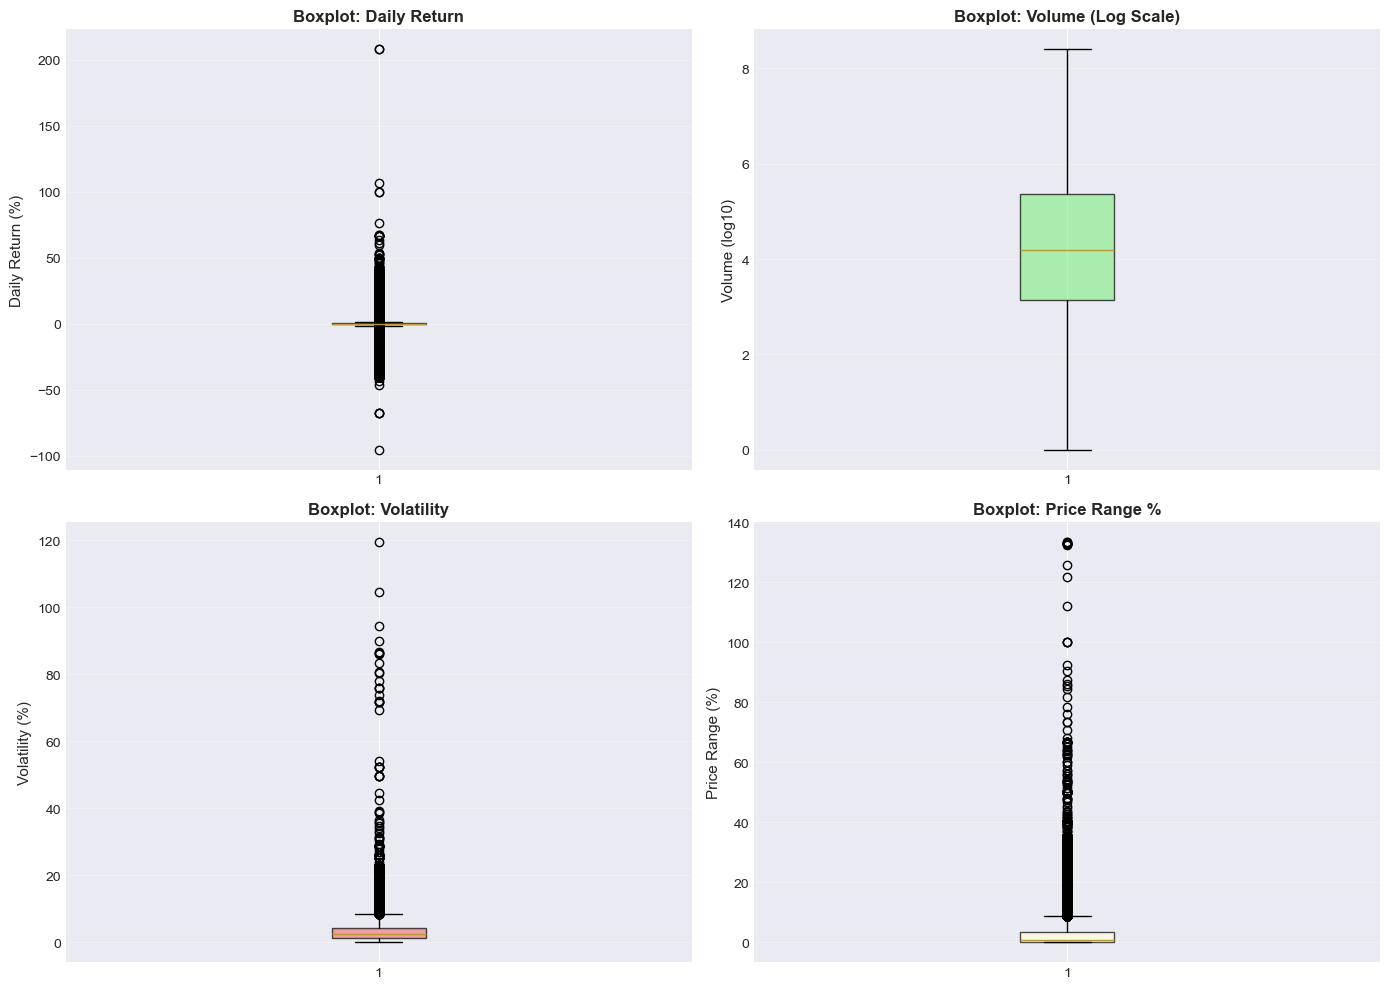

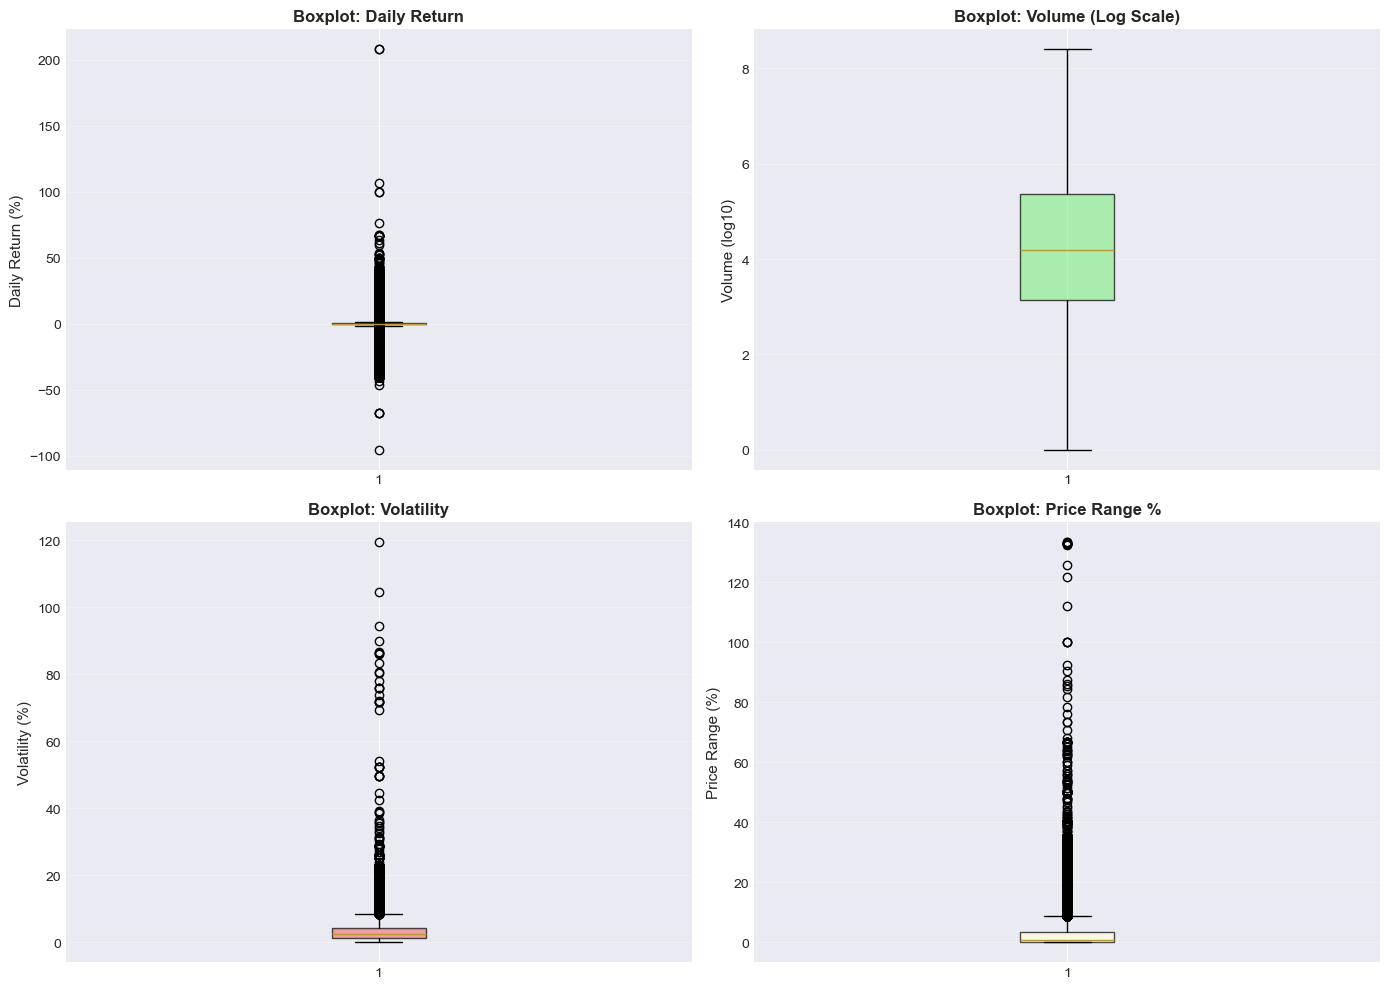

📊 OUTLIER DETECTION (IQR Method):
  • daily_return        :  394,650 outliers (32.34%)
  • volume              :  143,728 outliers (17.21%)
  • volatility          :   41,553 outliers ( 3.41%)
  • price_range_pct     :   86,909 outliers ( 7.11%)

  ⚠ High outlier percentage is expected in financial data due to:
     - Market shocks / Black swan events
     - Stock-specific news (earnings, M&A, etc.)
     - IPO/delisting events


In [22]:
# Boxplots for outlier detection
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Daily Return
axes[0, 0].boxplot(df['daily_return'].dropna(), vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0, 0].set_ylabel('Daily Return (%)', fontsize=11)
axes[0, 0].set_title('Boxplot: Daily Return', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Volume (log scale)
df_vol_nonzero = df[df['volume'] > 0]
axes[0, 1].boxplot(np.log10(df_vol_nonzero['volume']), vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[0, 1].set_ylabel('Volume (log10)', fontsize=11)
axes[0, 1].set_title('Boxplot: Volume (Log Scale)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Volatility
axes[1, 0].boxplot(df['volatility'].dropna(), vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[1, 0].set_ylabel('Volatility (%)', fontsize=11)
axes[1, 0].set_title('Boxplot: Volatility', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Price Range %
axes[1, 1].boxplot(df['price_range_pct'].dropna(), vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightyellow', alpha=0.7))
axes[1, 1].set_ylabel('Price Range (%)', fontsize=11)
axes[1, 1].set_title('Boxplot: Price Range %', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Outlier statistics using IQR method
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((series < lower_bound) | (series > upper_bound)).sum()
    return outliers, (outliers / len(series)) * 100

print("📊 OUTLIER DETECTION (IQR Method):")
for col in ['daily_return', 'volume', 'volatility', 'price_range_pct']:
    if col in df.columns:
        data = df[col].dropna()
        if col == 'volume':
            data = data[data > 0]
        count, pct = count_outliers_iqr(data)
        print(f"  • {col:20s}: {count:>8,} outliers ({pct:>5.2f}%)")

print("\n  ⚠ High outlier percentage is expected in financial data due to:")
print("     - Market shocks / Black swan events")
print("     - Stock-specific news (earnings, M&A, etc.)")
print("     - IPO/delisting events")

In [23]:
# Find extreme outliers
print("\n📍 EXTREME OUTLIERS (Top 10 Daily Returns):")
extreme_returns = df.nlargest(10, 'daily_return')[['time', 'symbol', 'close', 'daily_return']]
display(extreme_returns)

print("\n📍 EXTREME OUTLIERS (Top 10 Volume Spikes):")
extreme_volume = df.nlargest(10, 'volume')[['time', 'symbol', 'volume', 'daily_return']]
display(extreme_volume)


📍 EXTREME OUTLIERS (Top 10 Daily Returns):



📍 EXTREME OUTLIERS (Top 10 Daily Returns):


,time,symbol,close,daily_return
674568,2021-08-23,NSS,7.45,207.851240
674576,2021-09-06,NSS,7.45,207.851240
228274,2023-08-01,DCF,63.35,106.823376
777639,2021-11-10,PTG,0.20,100.000000
1146206,2024-05-15,VLP,0.16,100.000000
325398,2021-08-03,FBC,2.94,76.047904
157108,2021-08-23,CHC,2.24,67.164179
157116,2021-09-06,CHC,2.24,67.164179
1140889,2021-08-02,VKP,0.50,66.666667
1140903,2021-08-20,VKP,0.50,66.666667



📍 EXTREME OUTLIERS (Top 10 Daily Returns):


,time,symbol,close,daily_return
674568,2021-08-23,NSS,7.45,207.851240
674576,2021-09-06,NSS,7.45,207.851240
228274,2023-08-01,DCF,63.35,106.823376
777639,2021-11-10,PTG,0.20,100.000000
1146206,2024-05-15,VLP,0.16,100.000000
325398,2021-08-03,FBC,2.94,76.047904
157108,2021-08-23,CHC,2.24,67.164179
157116,2021-09-06,CHC,2.24,67.164179
1140889,2021-08-02,VKP,0.50,66.666667
1140903,2021-08-20,VKP,0.50,66.666667



📍 EXTREME OUTLIERS (Top 10 Volume Spikes):



📍 EXTREME OUTLIERS (Top 10 Daily Returns):


,time,symbol,close,daily_return
674568,2021-08-23,NSS,7.45,207.851240
674576,2021-09-06,NSS,7.45,207.851240
228274,2023-08-01,DCF,63.35,106.823376
777639,2021-11-10,PTG,0.20,100.000000
1146206,2024-05-15,VLP,0.16,100.000000
325398,2021-08-03,FBC,2.94,76.047904
157108,2021-08-23,CHC,2.24,67.164179
157116,2021-09-06,CHC,2.24,67.164179
1140889,2021-08-02,VKP,0.50,66.666667
1140903,2021-08-20,VKP,0.50,66.666667



📍 EXTREME OUTLIERS (Top 10 Volume Spikes):


,time,symbol,volume,daily_return
889108,2025-07-07,SHB,249760712,6.956522
889057,2025-04-22,SHB,222754011,0.000000
452622,2025-08-05,HPG,215999100,4.347826
889163,2025-09-24,SHB,191797400,2.058824
889174,2025-10-09,SHB,189712900,3.468208
889126,2025-07-31,SHB,181370556,6.807018
889129,2025-08-05,SHB,176294404,-1.336574
889071,2025-05-15,SHB,167986019,5.320108
889142,2025-08-22,SHB,166330794,-6.756757
457459,2022-11-30,HPX,165260319,6.933020


---

## 5. Tổng kết (Conclusion)

### 5.1. Tóm tắt Chất lượng Dữ liệu

In [24]:
print("=" * 80)
print("DATA QUALITY SUMMARY")
print("=" * 80)

# Quality metrics
missing_rate = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
duplicate_rate = (df.duplicated(subset=['time', 'symbol']).sum() / len(df)) * 100
zero_volume_rate = ((df['volume'] == 0).sum() / len(df)) * 100

print(f"\n✓ STRENGTHS:")
print(f"  • No missing values ({missing_rate:.2f}%)")
print(f"  • No duplicate records ({duplicate_rate:.2f}%)")
print(f"  • Price logic is consistent (High >= Low, etc.)")
print(f"  • Large dataset: {len(df):,} rows covering {df['symbol'].nunique()} stocks")

print(f"\n⚠ WEAKNESSES:")
print(f"  • {zero_volume_rate:.1f}% of days have zero volume (illiquid stocks)")
print(f"  • High volatility in returns (fat tails, high kurtosis)")
print(f"  • Volume is highly skewed (median << mean)")
print(f"  • Class imbalance in trend labels ('Hold' dominates)")

print(f"\n📊 OVERALL ASSESSMENT:")
if missing_rate == 0 and duplicate_rate == 0:
    print(f"  ✓ Dataset is CLEAN and READY for modeling")
else:
    print(f"  ⚠ Dataset needs cleaning before modeling")

print("=" * 80)

DATA QUALITY SUMMARY

✓ STRENGTHS:
  • No missing values (0.04%)
  • No duplicate records (0.00%)
  • Price logic is consistent (High >= Low, etc.)
  • Large dataset: 1,221,931 rows covering 1600 stocks

⚠ WEAKNESSES:
  • 31.7% of days have zero volume (illiquid stocks)
  • High volatility in returns (fat tails, high kurtosis)
  • Volume is highly skewed (median << mean)
  • Class imbalance in trend labels ('Hold' dominates)

📊 OVERALL ASSESSMENT:
  ⚠ Dataset needs cleaning before modeling

✓ STRENGTHS:
  • No missing values (0.04%)
  • No duplicate records (0.00%)
  • Price logic is consistent (High >= Low, etc.)
  • Large dataset: 1,221,931 rows covering 1600 stocks

⚠ WEAKNESSES:
  • 31.7% of days have zero volume (illiquid stocks)
  • High volatility in returns (fat tails, high kurtosis)
  • Volume is highly skewed (median << mean)
  • Class imbalance in trend labels ('Hold' dominates)

📊 OVERALL ASSESSMENT:
  ⚠ Dataset needs cleaning before modeling


### 5.2. Đề xuất Xử lý cho Machine Learning

In [25]:
print("=" * 80)
print("RECOMMENDED PREPROCESSING STEPS FOR ML")
print("=" * 80)

print("\n1️⃣ DATA CLEANING:")
print("   • Remove rows with next_day_return = NaN (cannot train on them)")
print("   • Consider filtering out stocks with >50% zero-volume days")
print("   • Cap extreme outliers at 99th percentile (or use robust scaling)")

print("\n2️⃣ FEATURE ENGINEERING:")
print("   • Keep: close, volume, daily_return, volatility, ma_divergence")
print("   • Drop: open, high, low (multicollinearity with close)")
print("   • Add: RSI, MACD, Bollinger Bands (advanced technical indicators)")
print("   • Add: lag features (previous N days returns)")

print("\n3️⃣ FEATURE SCALING:")
print("   • Use RobustScaler (handles outliers better than StandardScaler)")
print("   • Alternative: Log transform for volume")

print("\n4️⃣ HANDLING CLASS IMBALANCE:")
trend_counts = df['trend'].value_counts()
if 'Hold' in trend_counts:
    hold_pct = (trend_counts['Hold'] / trend_counts.sum()) * 100
    if hold_pct > 60:
        print(f"   • 'Hold' class is {hold_pct:.1f}% - SEVERE IMBALANCE")
        print("   • Option 1: Use class_weight='balanced' in model")
        print("   • Option 2: Apply SMOTE (Synthetic Minority Over-sampling)")
        print("   • Option 3: Adjust threshold to reduce 'Hold' dominance")
        print("   • Option 4: Remove 'Hold' class and do binary Up/Down classification")

print("\n5️⃣ TRAIN/TEST SPLIT:")
print("   • Use TimeSeriesSplit (respect temporal order)")
print("   • DON'T use random shuffle (causes data leakage)")
print("   • Recommended: 80/20 split or walk-forward validation")

print("\n6️⃣ FEATURE SELECTION:")
print("   • Check feature importance after initial model")
print("   • Remove features with VIF > 10 (multicollinearity)")

print("=" * 80)
print("\n✅ After these steps, data will be ready for modeling!")

RECOMMENDED PREPROCESSING STEPS FOR ML

1️⃣ DATA CLEANING:
   • Remove rows with next_day_return = NaN (cannot train on them)
   • Consider filtering out stocks with >50% zero-volume days
   • Cap extreme outliers at 99th percentile (or use robust scaling)

2️⃣ FEATURE ENGINEERING:
   • Keep: close, volume, daily_return, volatility, ma_divergence
   • Drop: open, high, low (multicollinearity with close)
   • Add: RSI, MACD, Bollinger Bands (advanced technical indicators)
   • Add: lag features (previous N days returns)

3️⃣ FEATURE SCALING:
   • Use RobustScaler (handles outliers better than StandardScaler)
   • Alternative: Log transform for volume

4️⃣ HANDLING CLASS IMBALANCE:
   • 'Hold' class is 61.5% - SEVERE IMBALANCE
   • Option 1: Use class_weight='balanced' in model
   • Option 2: Apply SMOTE (Synthetic Minority Over-sampling)
   • Option 3: Adjust threshold to reduce 'Hold' dominance
   • Option 4: Remove 'Hold' class and do binary Up/Down classification

5️⃣ TRAIN/TEST SPLI

### 5.3. Key Findings Summary

In [26]:
print("=" * 80)
print("KEY FINDINGS")
print("=" * 80)

print("\n📌 DATASET CHARACTERISTICS:")
print(f"   • {len(df):,} trading records")
print(f"   • {df['symbol'].nunique()} unique stocks")
print(f"   • {(df['time'].max() - df['time'].min()).days} days of data")
print(f"   • Average price: {df['close'].mean():,.2f} VND")
print(f"   • Average daily return: {df['daily_return'].mean():.3f}%")

print("\n📌 DATA QUALITY:")
print("   ✓ No missing values")
print("   ✓ No duplicates")
print("   ✓ Price logic is valid")
print(f"   ⚠ {((df['volume'] == 0).sum() / len(df) * 100):.1f}% zero-volume days")

print("\n📌 MARKET BEHAVIOR:")
market_avg_return = df.groupby('time')['daily_return'].mean().mean()
print(f"   • Overall market trend: {'Uptrend ↗' if market_avg_return > 0 else 'Downtrend ↘'}")
print(f"   • Return distribution: Fat-tailed (high kurtosis)")
print(f"   • Volume distribution: Right-skewed")

print("\n📌 LABEL DISTRIBUTION:")
trend_pcts = df['trend'].value_counts(normalize=True) * 100
for label in ['Up', 'Down', 'Hold']:
    if label in trend_pcts:
        print(f"   • {label:5s}: {trend_pcts[label]:>5.1f}%")

print("\n📌 FEATURE CORRELATIONS:")
print("   • Open/High/Low/Close: Highly correlated (>0.99)")
print("   • Volume vs Volatility: Weak correlation")
print("   • Price vs Volume: No strong pattern")

print("\n📌 OUTLIERS:")
print("   • Significant outliers present in returns and volume")
print("   • Expected in financial data (market shocks, news events)")

print("=" * 80)
print("\n🎯 CONCLUSION: Dataset is suitable for ML modeling after preprocessing")
print("=" * 80)

KEY FINDINGS

📌 DATASET CHARACTERISTICS:
   • 1,221,931 trading records
   • 1600 unique stocks
   • 1694 days of data
   • Average price: 18.33 VND
   • Average daily return: 0.073%

📌 DATA QUALITY:
   ✓ No missing values
   ✓ No duplicates
   ✓ Price logic is valid
   ⚠ 31.7% zero-volume days

📌 MARKET BEHAVIOR:
   • Overall market trend: Uptrend ↗
   • Return distribution: Fat-tailed (high kurtosis)
   • Volume distribution: Right-skewed

📌 LABEL DISTRIBUTION:
   • Up   :  19.3%
   • Down :  19.2%
   • Hold :  61.5%

📌 FEATURE CORRELATIONS:
   • Open/High/Low/Close: Highly correlated (>0.99)
   • Volume vs Volatility: Weak correlation
   • Price vs Volume: No strong pattern

📌 OUTLIERS:
   • Significant outliers present in returns and volume
   • Expected in financial data (market shocks, news events)

🎯 CONCLUSION: Dataset is suitable for ML modeling after preprocessing


---

## 📝 End of EDA Report

**Next Steps:**
1. Clean and preprocess data based on recommendations
2. Perform feature engineering (add technical indicators)
3. Handle class imbalance
4. Build and train machine learning models
5. Evaluate model performance